# Ancestry and Income
## Scott Breitbach
### 14-November-2020

In [1]:
# pip install thinkx

In [2]:
# Load libraries
from __future__ import print_function, division
import numpy as np
import pandas as pd
import thinkstats2
from thinkstats2 import Mean, MeanVar, Var, Std, Cov
import thinkplot
import statsmodels.formula.api as smf
import matplotlib
%matplotlib inline

## Data Cleaning
Data set pulled from [norc.org](https://gssdataexplorer.norc.org/)

In [3]:
# Read data file to dataframe
gss = r'data/GSS.xlsx'
df = pd.read_excel(gss)

# Fix weird spacing of year column
df = df.rename(columns={'Gss year for this respondent                       ':'Gss year for this respondent'})

In [4]:
# Look at column names
origColumns = df.columns.tolist()
origColumns

['Gss year for this respondent',
 'Respondents income (86)',
 'Respondents income',
 'Total family income',
 'Number of persons in household',
 'How many grandparents born outside u.s.',
 'Age of respondent',
 'Travel time to work',
 'Number of hours worked last week',
 'Respondent id number',
 'Rs occupational prestige score (2010)']

In [5]:
# Rename column headers
df = df.rename(columns={'Gss year for this respondent':'year',
 'Respondents income (86)':'rincome86',
 'Respondents income':'rincome',
 'Total family income':'income',
 'Number of persons in household':'hompop',
 'How many grandparents born outside u.s.':'granborn',
 'Age of respondent':'age',
 'Travel time to work':'commute',
 'Number of hours worked last week':'hrs1',
 'Respondent id number':'id',
 'Rs occupational prestige score (2010)':'prestg10'})

In [6]:
# Verify new column names
newColumns = df.columns.tolist()
newColumns

['year',
 'rincome86',
 'rincome',
 'income',
 'hompop',
 'granborn',
 'age',
 'commute',
 'hrs1',
 'id',
 'prestg10']

Note: *'rincome'* is an adjusted value available for all years of the survey, while *'rincome86'* is for the years 1986-1990 and is not adjusted.

In [7]:
def CleanColumn(df, columnName):
    '''Replaces various non-answers with Null values'''
    na_vals = ["Don't know", "No answer", "Not applicable", "Refused"]
    df[columnName].replace(na_vals, np.nan, inplace = True)
    return df

def CleanData(df):
    '''Tidies up some various aspects of the dataset'''
    for item in newColumns:
        df = CleanColumn(df, item)
    
    # Create unique user IDs for each row:
    df['uniqueID'] = df['year'].map(str) + '-' + df['id'].map(str)
    
    # Replace age of '89 or older' with 89
    df['age'] = df['age'].replace(['89 or older'], 89)

    # Replace grandparents born 'All in u.s' with 0 (born outside U.S.)
    df['granborn'] = df['granborn'].replace(['All in u.s'], 0)

    # Replace travel time of '97+ minutes' with 97
    df['commute'] = df['commute'].replace(['97+ minutes'], 97)
    
    return df

In [8]:
# Clean up dataset
df = CleanData(df)

In [9]:
# Look at data types of each column
display(df.dtypes)

year           int64
rincome86     object
rincome       object
income        object
hompop       float64
granborn     float64
age          float64
commute      float64
hrs1         float64
id             int64
prestg10       int64
uniqueID      object
dtype: object

In [10]:
def FixIncVals(column):
    '''Replaces income ranges with average values in a new column'''
    column = column.replace(['Lt $1000'], 500)
    column = column.replace(['$1000 to 2999'], 2000)
    column = column.replace(['$3000 to 3999'], 3500)
    column = column.replace(['$4000 to 4999'], 4500)
    column = column.replace(['$5000 to 5999'], 5500)
    column = column.replace(['$6000 to 6999'], 6500)
    column = column.replace(['$7000 to 7999'], 7500)
    column = column.replace(['$8000 to 9999'], 9000)
    column = column.replace(['$10000 - 14999'], 12500)
    column = column.replace(['$15000 - 19999'], 17500)
    column = column.replace(['$20000 - 24999'], 22500)
    column = column.replace(['$25000 or more'], 25000)
    return column

In [11]:
# Display unique values in income column
df.rincome86.unique()

array([nan, '$20000-22499', '$6000-6999', '$8000-9999', '$4000-4999',
       '$12500-14999', '$25000-29999', '$5000-5999', '$10000-12499',
       '$22500-24999', '$7000-7999', '$15000-17499', '$40000-49999',
       '$30000-34999', '$50000-59999', '$17500-19999', '$1000-2999',
       '$3000-3999', '$35000-39999', '$60000+', 'Lt $1000'], dtype=object)

In [12]:
# Create new columns with usabale values:
df['rincome2'] = FixIncVals(df['rincome'])
df['income2'] = FixIncVals(df['income'])

In [13]:
def FixIncVals86(column):
    '''Replace income ranges with average values in a new column'''
    column = column.replace(['Lt $1000'], 500)
    column = column.replace(['$1000-2999'], 2000)
    column = column.replace(['$3000-3999'], 3500)
    column = column.replace(['$4000-4999'], 4500)
    column = column.replace(['$5000-5999'], 5500)
    column = column.replace(['$6000-6999'], 6500)
    column = column.replace(['$7000-7999'], 7500)
    column = column.replace(['$8000-9999'], 9000)
    column = column.replace(['$10000-12499'], 11250)
    column = column.replace(['$12500-14999'], 13750)
    column = column.replace(['$15000-17499'], 16250)
    column = column.replace(['$17500-19999'], 18750)
    column = column.replace(['$20000-22499'], 21250)
    column = column.replace(['$22500-24999'], 23750)
    column = column.replace(['$25000-29999'], 27500)
    column = column.replace(['$30000-34999'], 32500)
    column = column.replace(['$35000-39999'], 37500)
    column = column.replace(['$40000-49999'], 45000)
    column = column.replace(['$50000-59999'], 55000)
    column = column.replace(['$60000+'], 60000)

    return column

In [14]:
# Display unique values in income column
df.rincome86.unique()

array([nan, '$20000-22499', '$6000-6999', '$8000-9999', '$4000-4999',
       '$12500-14999', '$25000-29999', '$5000-5999', '$10000-12499',
       '$22500-24999', '$7000-7999', '$15000-17499', '$40000-49999',
       '$30000-34999', '$50000-59999', '$17500-19999', '$1000-2999',
       '$3000-3999', '$35000-39999', '$60000+', 'Lt $1000'], dtype=object)

In [15]:
# Create new columns with usabale values:
df['rincome86_2'] = FixIncVals86(df['rincome86'])

In [16]:
def IncomeBuckets(column):
    '''Replace income ranges with equally spaced buckets (truncated down) by 5000s'''
    column = column.replace(['Lt $1000'], 0)
    column = column.replace(['$1000 to 2999'], 0)
    column = column.replace(['$3000 to 3999'], 0)
    column = column.replace(['$4000 to 4999'], 0)
    column = column.replace(['$5000 to 5999'], 5000)
    column = column.replace(['$6000 to 6999'], 5000)
    column = column.replace(['$7000 to 7999'], 5000)
    column = column.replace(['$8000 to 9999'], 5000)
    column = column.replace(['$10000 - 14999'], 10000)
    column = column.replace(['$15000 - 19999'], 15000)
    column = column.replace(['$20000 - 24999'], 20000)
    column = column.replace(['$25000 or more'], 25000)
    
    return column

In [17]:
# Create new columns with usabale values:
df['rincome2b'] = IncomeBuckets(df['rincome'])

In [18]:
def IncomeBuckets86(column):
    '''Replace income ranges with equally spaced buckets (truncated down) by 10000s'''
    column = column.replace(['Lt $1000'], 0)
    column = column.replace(['$1000-2999'], 0)
    column = column.replace(['$3000-3999'], 0)
    column = column.replace(['$4000-4999'], 0)
    column = column.replace(['$5000-5999'], 0)
    column = column.replace(['$6000-6999'], 0)
    column = column.replace(['$7000-7999'], 0)
    column = column.replace(['$8000-9999'], 0)
    column = column.replace(['$10000-12499'], 10000)
    column = column.replace(['$12500-14999'], 10000)
    column = column.replace(['$15000-17499'], 10000)
    column = column.replace(['$17500-19999'], 10000)
    column = column.replace(['$20000-22499'], 20000)
    column = column.replace(['$22500-24999'], 20000)
    column = column.replace(['$25000-29999'], 20000)
    column = column.replace(['$30000-34999'], 30000)
    column = column.replace(['$35000-39999'], 30000)
    column = column.replace(['$40000-49999'], 40000)
    column = column.replace(['$50000-59999'], 50000)
    column = column.replace(['$60000+'], 60000)
    
    return column

In [19]:
# Create new columns with usabale values:
df['rincome86_2b'] = IncomeBuckets86(df['rincome86'])

In [20]:
# Look at first few rows of dataset
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN,5000.0,NaN
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN,5000.0,NaN
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN,NaN,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN,5000.0,NaN


## Bulletpoints for PowerPoint

### Histograms

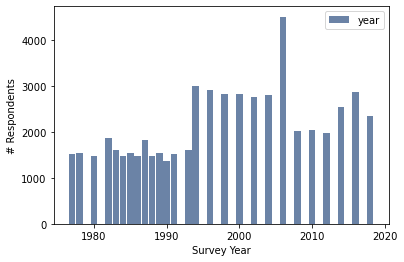

In [21]:
# Plot histogram of Survey Years
hist1 = thinkstats2.Hist(df.year, label='year')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Survey Year', ylabel='# Respondents')

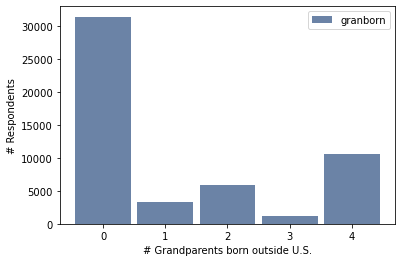

In [22]:
# Plot histogram of number of grandparents born outside the US
hist2 = thinkstats2.Hist(df.granborn, label='granborn')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='# Grandparents born outside U.S.', ylabel='# Respondents')

In [23]:
# Divide granborn into 2 groups: 
# Those born entirely in the US and those with at least 1 grandparent born outside US
granUS = df[df.granborn == 0]
granOut = df[df.granborn > 0]

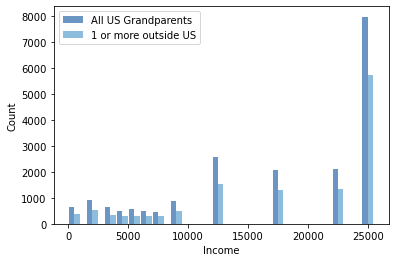

In [24]:
# Compare incomes of the 2 grandparent groups
granUS_hist = thinkstats2.Hist(granUS.rincome2, label='All US Grandparents')
granOut_hist = thinkstats2.Hist(granOut.rincome2, label='1 or more outside US')
# Set up plot
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(granUS_hist, align='right', width=width)
thinkplot.Hist(granOut_hist, align='left', width=width)
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [25]:
# Check sizes of new groups
len(granUS), len(granOut)

(31367, 20944)

Note: US grandparents group is larger than the other group. Need to compare later in a PMF.

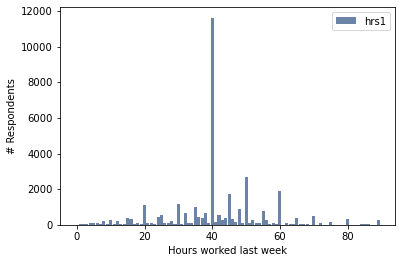

In [26]:
# Plot histogram of Hours worked in the last week
hist3 = thinkstats2.Hist(df.hrs1, label='hrs1')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Hours worked last week', ylabel='# Respondents')

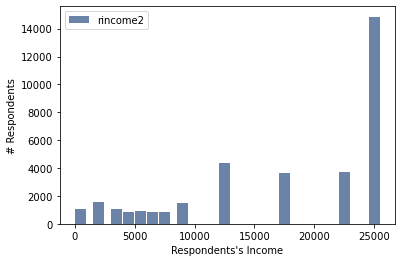

In [27]:
# Plot histogram of Respondent's Income
hist4 = thinkstats2.Hist(df.rincome2, label='rincome2')
thinkplot.Hist(hist4)
thinkplot.Config(xlabel="Respondents's Income", ylabel='# Respondents')

In [28]:
# Divide rincome2 into 2 groups: 
# Those making more than vs less than $20,000
incMore20k = df[df.rincome2 >= 20000]
incLess20k = df[df.rincome2 <= 20000]
# Check sizes of new groups
len(incMore20k), len(incLess20k)

(18601, 16640)

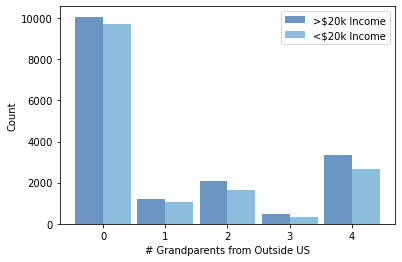

In [29]:
# Compare grandparents of the 2 income groups
incMore_hist = thinkstats2.Hist(incMore20k.granborn, label='>$20k Income')
incLess_hist = thinkstats2.Hist(incLess20k.granborn, label='<$20k Income')
# Set up plot
width = .45
thinkplot.PrePlot(2)
thinkplot.Hist(incMore_hist, align='right', width=width)
thinkplot.Hist(incLess_hist, align='left', width=width)
thinkplot.Config(xlabel='# Grandparents from Outside US', ylabel='Count')#, xlim=[0, 25000])

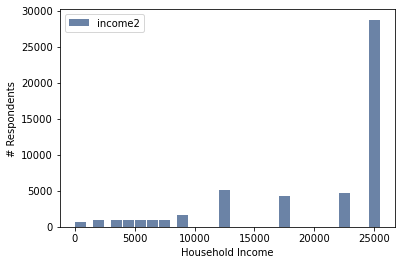

In [30]:
# Plot histogram of Household Income
hist4b = thinkstats2.Hist(df.income2, label='income2')
thinkplot.Hist(hist4b)
thinkplot.Config(xlabel="Household Income", ylabel='# Respondents')

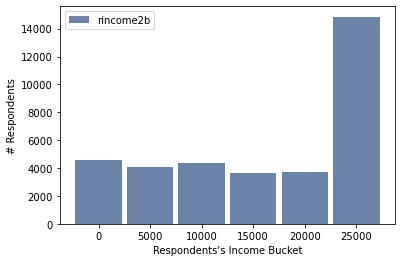

In [31]:
# Plot histogram of Respondent's Income in buckets
hist4c = thinkstats2.Hist(df.rincome2b, label='rincome2b')
thinkplot.Hist(hist4c)
thinkplot.Config(xlabel="Respondents's Income Bucket", ylabel='# Respondents')

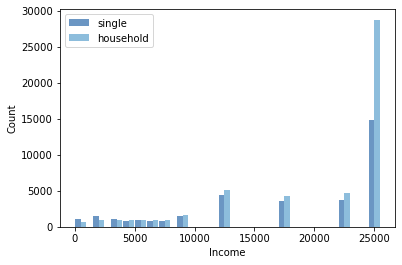

In [32]:
# Compare histograms of individual income to household income
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(hist4, align='right', width=width, label="single")
thinkplot.Hist(hist4b, align='left', width=width, label="household")
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [33]:
# Compare number of individual incomes vs number of household incomes
df['rincome2'].count(), df['income2'].count()

(35241, 50934)

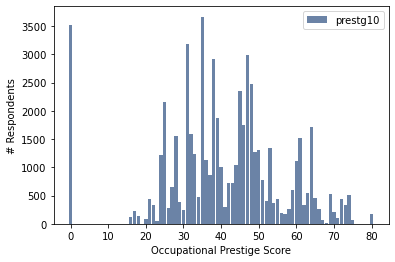

In [34]:
# Plot histogram of Prestige Scores
hist5 = thinkstats2.Hist(df.prestg10, label='prestg10')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Occupational Prestige Score', ylabel='# Respondents')

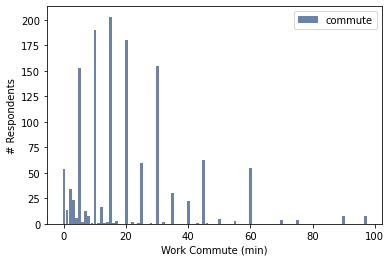

In [35]:
# Plot histogram of Commute time
hist6 = thinkstats2.Hist(df.commute, label='commute')
thinkplot.Hist(hist6)
thinkplot.Config(xlabel='Work Commute (min)', ylabel='# Respondents')

In [36]:
# Determine a middle time to divide commute into groups
df.commute.median()

15.0

In [37]:
# Divide rincome2 into 2 groups: 
# Those with longer vs shorter than 15 min commutes
close = df[df.commute <= 15]
far = df[df.commute > 15]
# Are the groups roughly the same size?
len(close), len(far)

(721, 609)

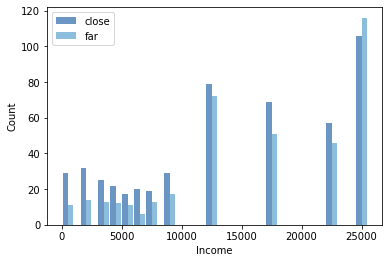

In [38]:
# Compare incomes of the two commute groups
close_hist = thinkstats2.Hist(close.rincome2, label='close')
far_hist = thinkstats2.Hist(far.rincome2, label='far')
# Set up plot
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(close_hist, align='right', width=width)
thinkplot.Hist(far_hist, align='left', width=width)
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

Note: Those in the highest income group tend to have a farther commute.

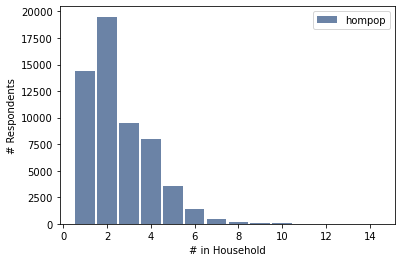

In [39]:
# Plot histogram of Household size
hist7 = thinkstats2.Hist(df.hompop, label='hompop')
thinkplot.Hist(hist7)
thinkplot.Config(xlabel='# in Household', ylabel='# Respondents')

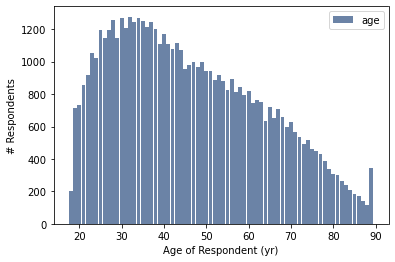

In [40]:
# Plot histogram of Respondent age
hist8 = thinkstats2.Hist(df.age, label='age')
thinkplot.Hist(hist8)
thinkplot.Config(xlabel='Age of Respondent (yr)', ylabel='# Respondents')

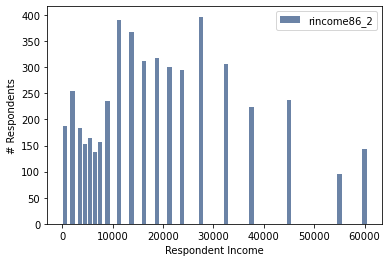

In [41]:
# Plot histogram of Respondent's income (for '86 data)
hist9 = thinkstats2.Hist(df.rincome86_2, label='rincome86_2')
thinkplot.Hist(hist9)
thinkplot.Config(xlabel='Respondent Income', ylabel='# Respondents')

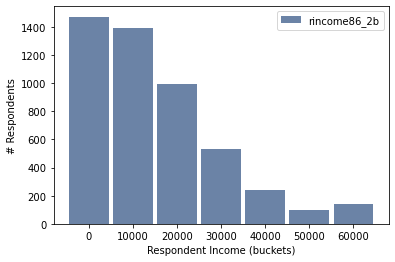

In [42]:
# Plot histogram of Respondent income (by buckets)
hist10 = thinkstats2.Hist(df.rincome86_2b, label='rincome86_2b')
thinkplot.Hist(hist10)
thinkplot.Config(xlabel='Respondent Income (buckets)', ylabel='# Respondents')

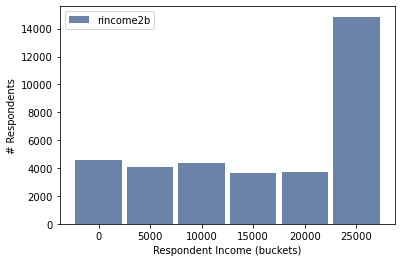

In [43]:
# Plot histogram of Respondent income (by buckets; '86 data)
hist11 = thinkstats2.Hist(df.rincome2b, label='rincome2b')
thinkplot.Hist(hist11)
thinkplot.Config(xlabel='Respondent Income (buckets)', ylabel='# Respondents')

### Variable Charcteristics
#### Mean, Mode, Spread, & Tails

In [44]:
# Look at data
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN,5000.0,NaN
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN,5000.0,NaN
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN,NaN,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN,5000.0,NaN


In [45]:
# Determine the mode for each variable
df.mode(numeric_only=True)[0:1]

,year,hompop,granborn,age,commute,hrs1,id,prestg10,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,2006.0,2.0,0.0,32.0,15.0,40.0,1,35.0,25000.0,25000.0,27500.0,25000.0,0.0


In [46]:
def SummaryStats(var):
    '''Prints a list of summary stats for each variable'''
    minv = df[var].min()
    medv = df[var].median()
    maxv = df[var].max()
    meanv = round(df[var].mean(), 1)
    stdv = round(df[var].std(), 1)
    
    print("Variable:", var)
    print("  Minimum:\t", minv)
    print("  Median:\t\t", medv)
    print("  Maximum:\t", maxv)
    print("  Mean:\t\t", meanv)
    print("  Std. Dev.\t", stdv)

In [47]:
# Select columns to get summary stats
statVars = ['year', 'hompop', 'granborn', 'age', 'hrs1', 'commute', 'prestg10', 
            'rincome2', 'income2', 'rincome86_2', 'rincome86_2b']
# # Alternatively: 
# statVars = df.select_dtypes(include='number').columns

# Get summary stats
for item in statVars:
    SummaryStats(item)

Variable: year
  Minimum:	 1977
  Median:		 1998.0
  Maximum:	 2018
  Mean:		 1997.7
  Std. Dev.	 11.8
Variable: hompop
  Minimum:	 1.0
  Median:		 2.0
  Maximum:	 14.0
  Mean:		 2.6
  Std. Dev.	 1.4
Variable: granborn
  Minimum:	 0.0
  Median:		 0.0
  Maximum:	 4.0
  Mean:		 1.2
  Std. Dev.	 1.6
Variable: age
  Minimum:	 18.0
  Median:		 44.0
  Maximum:	 89.0
  Mean:		 46.3
  Std. Dev.	 17.5
Variable: hrs1
  Minimum:	 0.0
  Median:		 40.0
  Maximum:	 89.0
  Mean:		 41.5
  Std. Dev.	 14.3
Variable: commute
  Minimum:	 0.0
  Median:		 15.0
  Maximum:	 97.0
  Mean:		 20.2
  Std. Dev.	 17.1
Variable: prestg10
  Minimum:	 0
  Median:		 40.0
  Maximum:	 80
  Mean:		 40.5
  Std. Dev.	 16.3
Variable: rincome2
  Minimum:	 500.0
  Median:		 22500.0
  Maximum:	 25000.0
  Mean:		 17459.6
  Std. Dev.	 8426.3
Variable: income2
  Minimum:	 500.0
  Median:		 25000.0
  Maximum:	 25000.0
  Mean:		 19784.9
  Std. Dev.	 7449.8
Variable: rincome86_2
  Minimum:	 500.0
  Median:		 16250.0
  Maximum:	 60000.

In [48]:
# Alternatively:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,57224.0,1997.720712,11.790939,1977.0,1988.0,1998.0,2006.0,2018.0
hompop,57223.0,2.558534,1.445464,1.0,1.0,2.0,3.0,14.0
granborn,52311.0,1.162834,1.609431,0.0,0.0,0.0,2.0,4.0
age,57022.0,46.289204,17.537180,18.0,32.0,44.0,59.0,89.0
commute,1330.0,20.245865,17.082472,0.0,10.0,15.0,30.0,97.0
hrs1,34471.0,41.455107,14.253505,0.0,37.0,40.0,49.0,89.0
id,57224.0,1196.870299,852.797856,1.0,530.0,1060.0,1680.0,4510.0
prestg10,57224.0,40.498270,16.316093,0.0,31.0,40.0,49.0,80.0
rincome2,35241.0,17459.592520,8426.259155,500.0,12500.0,22500.0,25000.0,25000.0
income2,50934.0,19784.898103,7449.806970,500.0,12500.0,25000.0,25000.0,25000.0


### PMF Comparison
#### Compare scenarios in the data using a PMF

In [49]:
# Divide into low and high income groups
incMore20k = df[df.rincome2 >= 20000]
incLess20k = df[df.rincome2 <= 20000]

incMore_pmf = thinkstats2.Pmf(incMore20k.granborn, label='>$20k Income')
incLess_pmf = thinkstats2.Pmf(incLess20k.granborn, label='<$20k Income')

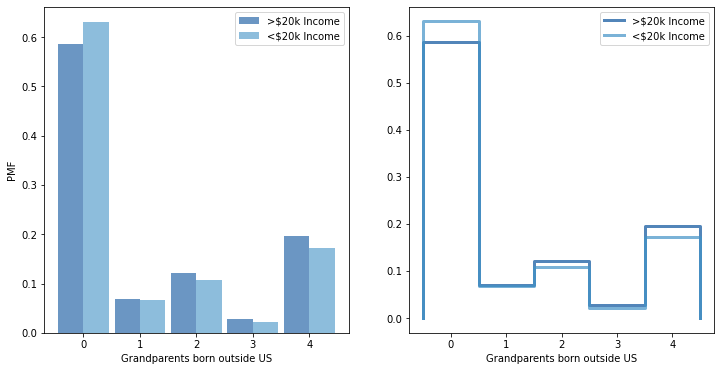

In [50]:
# Compare low and high income groups for each number of grandparents born outside US
width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(incMore_pmf, align='right', width=width)
thinkplot.Hist(incLess_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([incMore_pmf, incLess_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

In [51]:
# Divide into low and high occupational prestige score groups
hi_prestg = df[df.prestg10 >= 40]
lo_prestg = df[df.prestg10 < 40]

hi_prestg_pmf = thinkstats2.Pmf(hi_prestg.granborn, label='High Occupational Prestige')
lo_prestg_pmf = thinkstats2.Pmf(lo_prestg.granborn, label='Low Occupational Prestige')

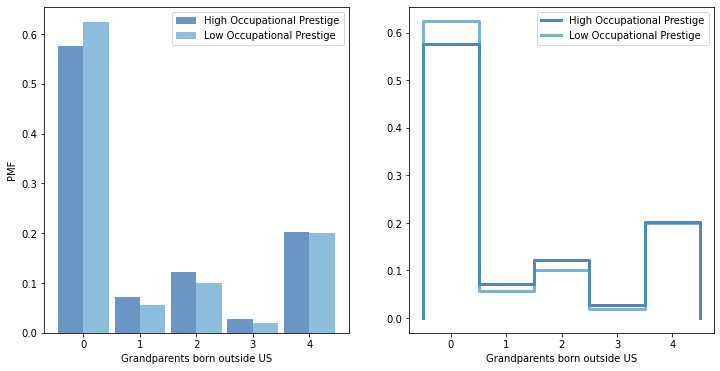

In [52]:
# Compare low and high occupational prestige for each number of grandparents born outside US
width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(hi_prestg_pmf, align='right', width=width)
thinkplot.Hist(lo_prestg_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([hi_prestg_pmf, lo_prestg_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

In [53]:
# Find median income
df.rincome86_2.median()

16250.0

In [54]:
# Divide into low and high income groups
incMore16k = df[df.rincome86_2 > 16250]
incLess16k = df[df.rincome86_2 <= 16250]

incMore16_pmf = thinkstats2.Pmf(incMore20k.granborn, label='> $16250 Income')
incLess16_pmf = thinkstats2.Pmf(incLess20k.granborn, label='<= $16250 Income')

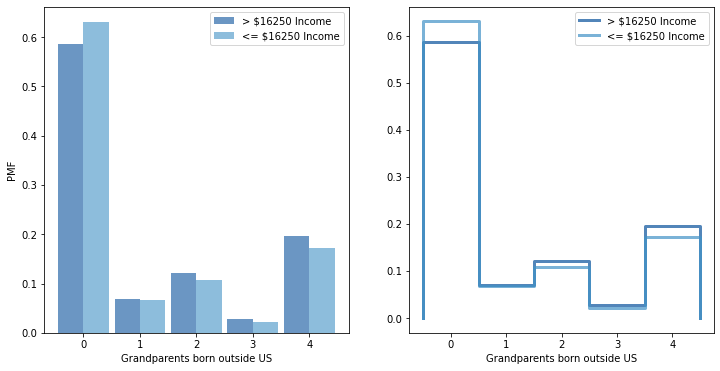

In [55]:
# Compare low and high income groups for each number of grandparents born outside US
width=0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(incMore16_pmf, align='right', width=width)
thinkplot.Hist(incLess16_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([incMore16_pmf, incLess16_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

### Create CDF

In [56]:
def MakeCDF(var):
    '''Creates CDF of chosen variable'''
    cdf = thinkstats2.Cdf(df[var], label=var)
    thinkplot.Cdf(cdf)
    thinkplot.Show(xlabel=var, ylabel='CDF')

In [57]:
# Create list of numeric variables for making CDFs
cdfVars = ['year', 'hompop', 'granborn', 'age', 'commute', 'hrs1', 'prestg10', 
           'rincome2', 'income2', 'rincome86_2', 'rincome86_2b']

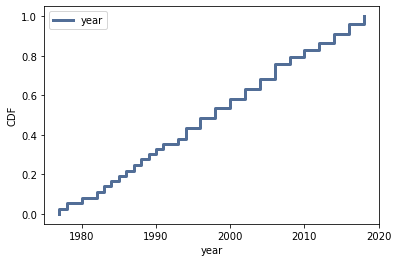

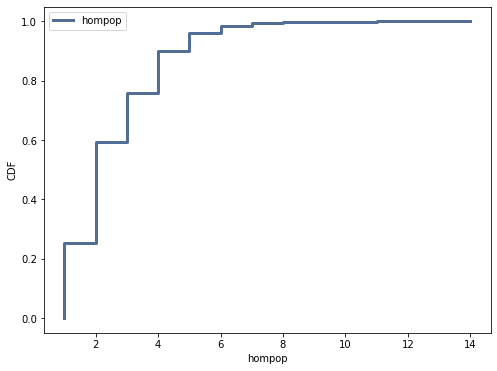

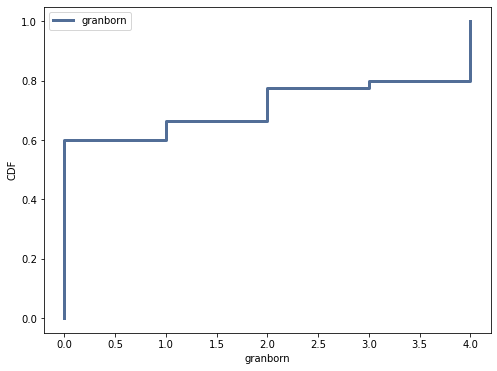

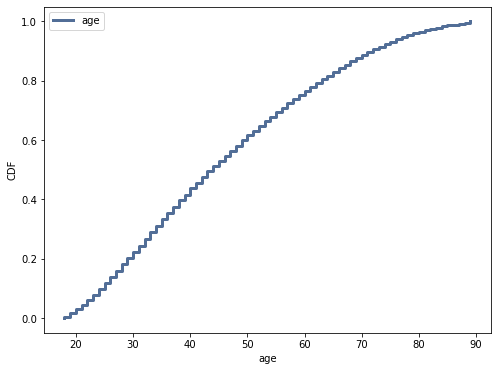

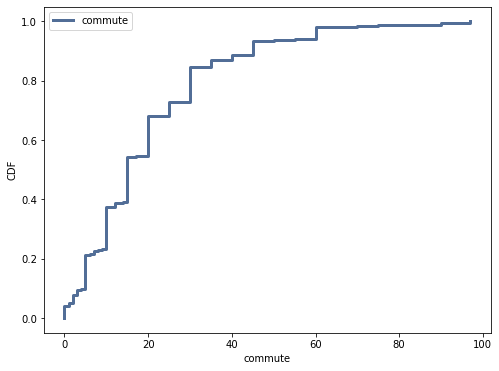

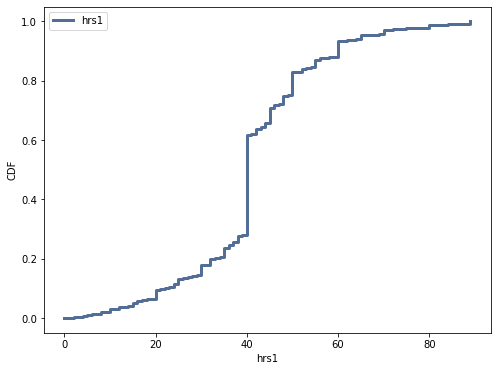

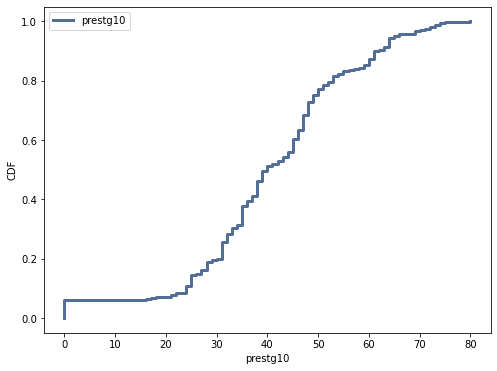

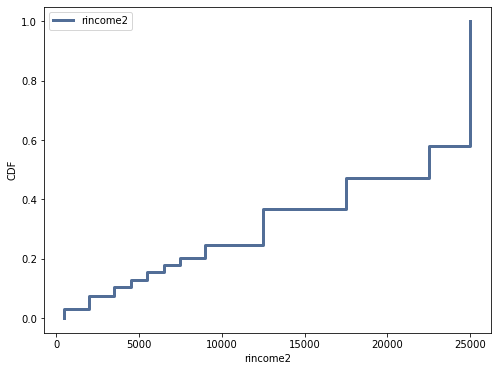

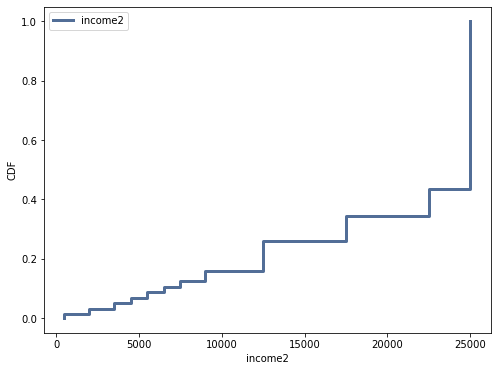

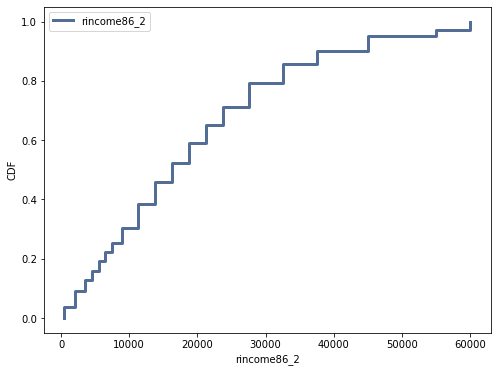

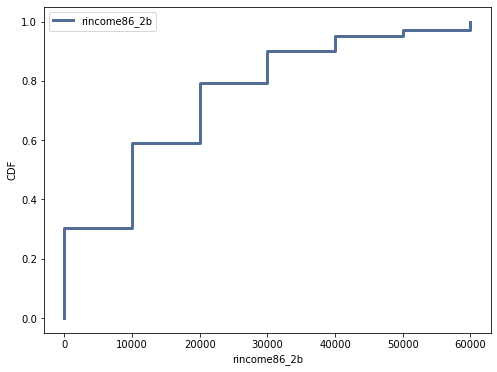

<Figure size 576x432 with 0 Axes>

In [58]:
# Make a series of CDFs from numeric variables
for item in cdfVars:
    MakeCDF(item)

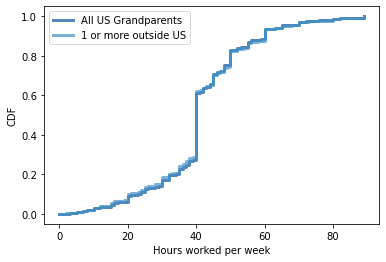

<Figure size 576x432 with 0 Axes>

In [59]:
# Compare CDFs of hours worked per week between those with all grandparents 
# born in the US and those with at least 1 grandparent born outside US.
granUS = df[df.granborn == 0]
granOut = df[df.granborn > 0]

granUS_cdf = thinkstats2.Cdf(granUS.hrs1, label='All US Grandparents')
granOut_cdf = thinkstats2.Cdf(granOut.hrs1, label='1 or more outside US')

thinkplot.PrePlot(2)
thinkplot.Cdfs([granUS_cdf, granOut_cdf])
thinkplot.Show(xlabel="Hours worked per week", ylabel="CDF")

### Analytical Distribution

In [60]:
def MakeCCDF(var):
    '''Creates a complimentary CDF for chosen variable'''
    cdf = thinkstats2.Cdf(df[var], label=var)
    thinkplot.Cdf(cdf, complement=True)
    thinkplot.Show(xlabel=var, ylabel='CCDF',
                  yscale='log', loc='upper right')

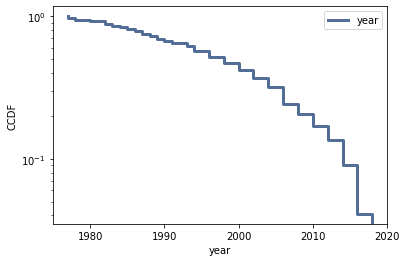

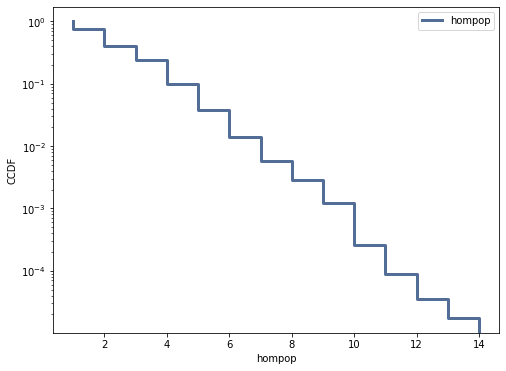

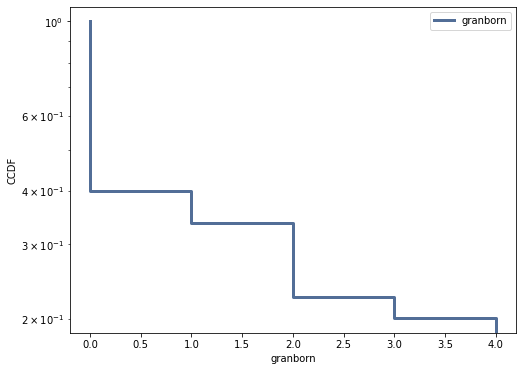

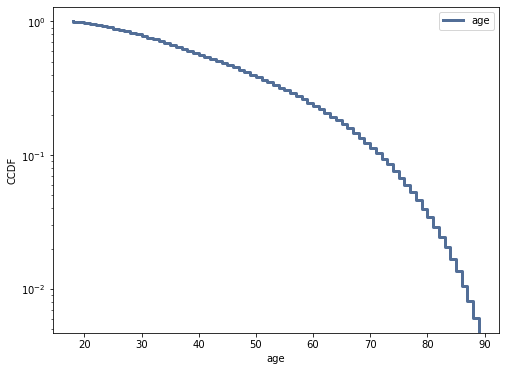

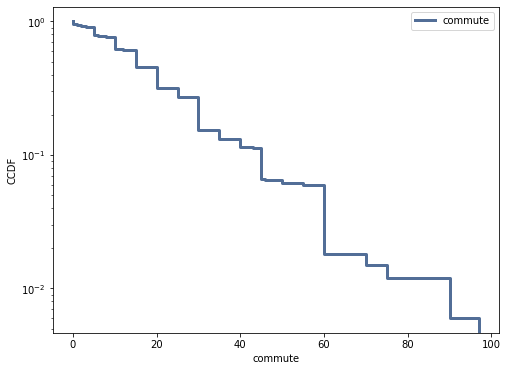

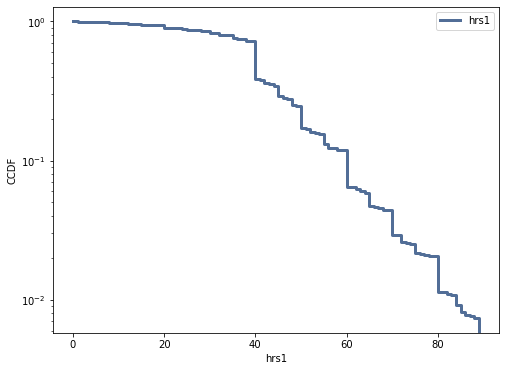

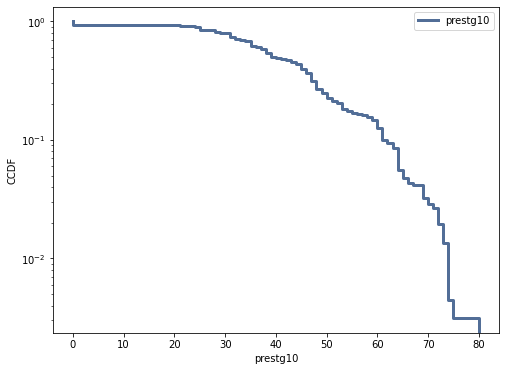

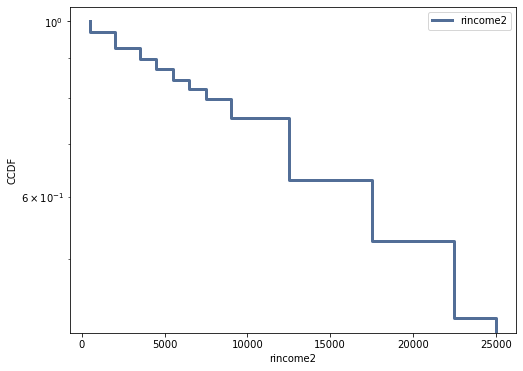

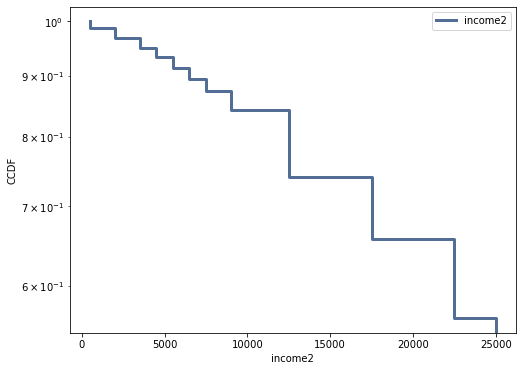

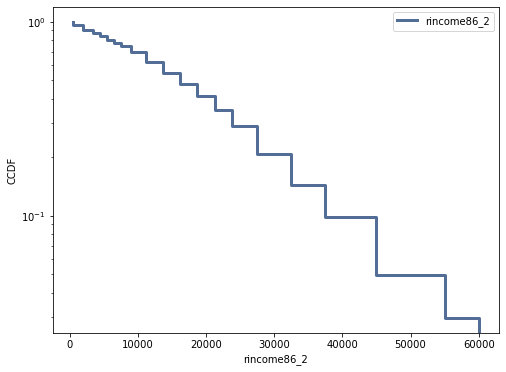

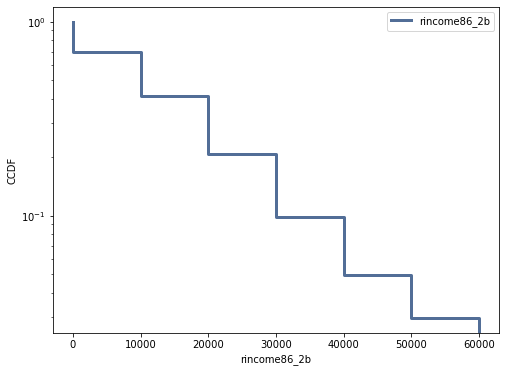

<Figure size 576x432 with 0 Axes>

In [61]:
# Make a series of complementary CDFs from numeric variables
for item in cdfVars:
    MakeCCDF(item)

Mean, Var 40.54900142653352 241.9623991455041
Sigma 15.555140601920128


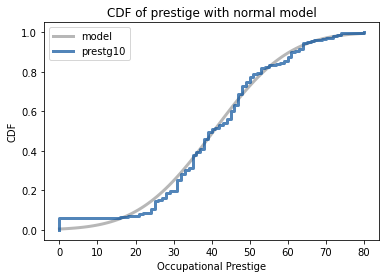

In [62]:
# Estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(df['prestg10'], p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=80)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df['prestg10'], label='prestg10')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(title='CDF of prestige with normal model',
                 xlabel='Occupational Prestige',
                 ylabel='CDF')

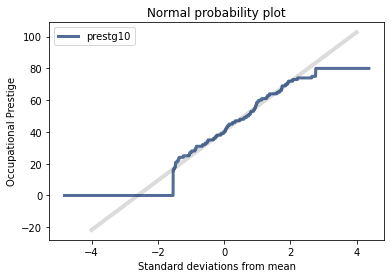

In [63]:
# Create a normal probability plot
mean, var = thinkstats2.TrimmedMeanVar(df['prestg10'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(df['prestg10'])
thinkplot.Plot(xs, ys, label='prestg10')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Occupational Prestige')

### Scatter Plots
Create scatter plots comparing two variables

In [64]:
# Create a cleaned data set by removing Null values
cleaned = df.dropna()

In [65]:
def Jitter(values, jitter=0.5):
    '''Jitter function for scatter plots'''
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [66]:
# Apply jitter to variables
prestg10 = Jitter(cleaned.prestg10, 4)
rincome = Jitter(cleaned.rincome86_2, 4000)
age = Jitter(cleaned.age, 0.4)
commute = Jitter(cleaned.commute, 4)
granborn = Jitter(cleaned.granborn, 0.4)

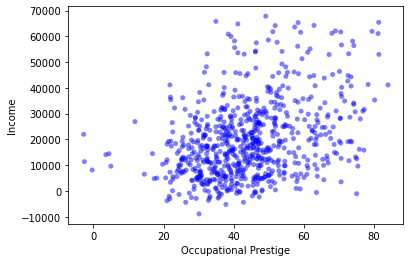

In [67]:
# Plot occupational prestige vs income
thinkplot.Scatter(prestg10, rincome, alpha=.5, s=25)
thinkplot.Config(xlabel='Occupational Prestige',
                 ylabel='Income',
                 legend=False)

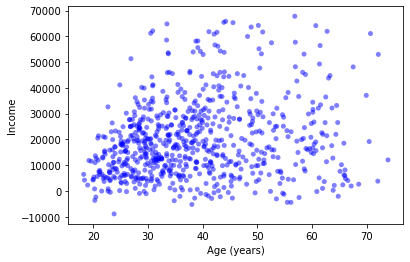

In [68]:
# Plot age vs income
thinkplot.Scatter(age, rincome, alpha=.5, s=25)
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Income',
                 legend=False)

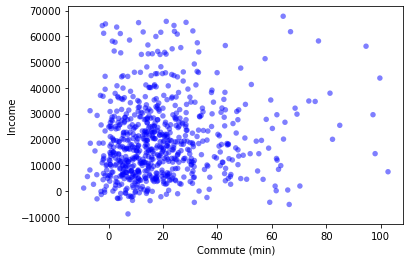

In [69]:
# Plot commute vs income
thinkplot.Scatter(commute, rincome, alpha=.5)
thinkplot.Config(xlabel='Commute (min)',
                 ylabel='Income',
                 legend=False)

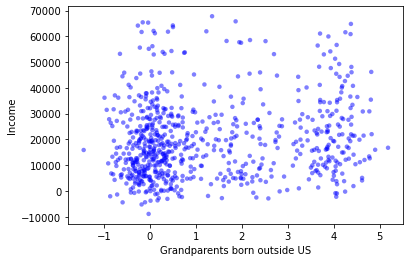

In [70]:
# Plot grandparents origin vs income
thinkplot.Scatter(granborn, rincome, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Income',
                 legend=False)

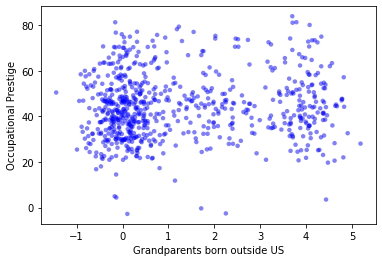

In [71]:
# Plot grandparents origin vs prestige
thinkplot.Scatter(granborn, prestg10, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Occupational Prestige',
                 legend=False)

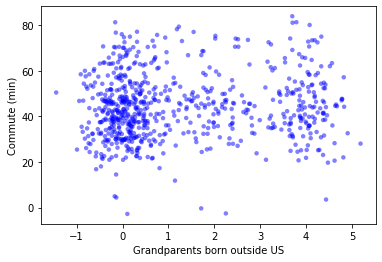

In [72]:
# Plot grandparents origin vs commute
thinkplot.Scatter(granborn, prestg10, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Commute (min)',
                 legend=False)

In [73]:
def Cov(xs, ys, meanx=None, meany=None):
    '''Return covariance of variable pairs'''
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

#### Covariance

In [74]:
print("Income vs Occupational Prestige:") 
round(Cov(rincome, prestg10), 1)

Income vs Occupational Prestige:


74466.4

In [75]:
print("Income vs Age:")
round(Cov(rincome, age), 1)

Income vs Age:


34954.5

In [76]:
print("Income vs Commute:")
round(Cov(rincome, commute), 1)

Income vs Commute:


31050.3

In [77]:
print("Grandparent's origin vs Income")
round(Cov(granborn, rincome), 1)

Grandparent's origin vs Income


3492.9

In [78]:
print("Grandparent's origin vs Occupational Prestige:")
round(Cov(granborn, prestg10), 2)

Grandparent's origin vs Occupational Prestige:


1.78

In [79]:
print("Grandparent's origin vs Commute:")
round(Cov(granborn, commute), 2)

Grandparent's origin vs Commute:


0.52

#### Correlation

In [80]:
def Corr(xs, ys):
    '''Return Correlation of variable pairs'''
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return round(corr, 3)

Get correlations between a several variables:

In [81]:
print("Income vs Occupational Prestige:") 
Corr(rincome, prestg10)

Income vs Occupational Prestige:


0.355

In [82]:
print("Income vs Age:")
Corr(rincome, age)

Income vs Age:


0.195

In [83]:
print("Income vs Commute:")
Corr(rincome, commute)

Income vs Commute:


0.12

In [84]:
print("Grandparent's origin vs Income")
Corr(granborn, rincome)

Grandparent's origin vs Income


0.14

In [85]:
print("Grandparent's origin vs Occupational Prestige:")
Corr(granborn, prestg10)

Grandparent's origin vs Occupational Prestige:


0.075

In [86]:
print("Grandparent's origin vs Commute:")
Corr(granborn, commute)

Grandparent's origin vs Commute:


0.018

In [87]:
def SpearmanCorr(xs, ys):
    '''Return Spearman's correlation for variable pairs'''
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

Get Spearman correlations between a several variables:

In [88]:
print("Income vs Occupational Prestige:") 
SpearmanCorr(rincome, prestg10)

Income vs Occupational Prestige:


0.33

In [89]:
print("Income vs Age:")
SpearmanCorr(rincome, age)

Income vs Age:


0.197

In [90]:
print("Income vs Commute:")
SpearmanCorr(rincome, commute)

Income vs Commute:


0.133

In [91]:
print("Grandparent's origin vs Income")
SpearmanCorr(granborn, rincome)

Grandparent's origin vs Income


0.136

In [92]:
print("Grandparent's origin vs Occupational Prestige:")
SpearmanCorr(granborn, prestg10)

Grandparent's origin vs Occupational Prestige:


0.084

In [93]:
print("Grandparent's origin vs Commute:")
SpearmanCorr(granborn, commute)

Grandparent's origin vs Commute:


0.028

### Test Hypothesis

In [94]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [95]:
# Difference in income between all US born grandparents 
#  and at least 1 grandparent born outside US:
granUS = cleaned[cleaned.granborn == 0]
granOut = cleaned[cleaned.granborn >= 1]

data = granUS.rincome86_2.values, granOut.rincome86_2.values

In [96]:
# Get p-value (p-value of < 1% is significant):
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.004

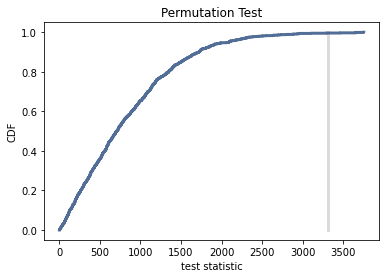

In [97]:
# Plot the distrubution of the test statistic (the difference in means) over many simulated samples:
ht.PlotCdf()
thinkplot.Config(title='Permutation Test',
                 xlabel='test statistic',
                 ylabel='CDF')

In [98]:
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat

In [99]:
# Calculate p-value
ht = DiffStdPermute(data)
pvalue = ht.PValue()
pvalue

0.934

In [100]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [101]:
# Calculate p-value
cleaned2 = df.dropna(subset=['granborn', 'rincome86_2'])
data2 = cleaned2.granborn.values, cleaned2.rincome86_2.values
ht = CorrelationPermute(data2)
pvalue = ht.PValue()
pvalue

0.0

In [102]:
ht.actual, ht.MaxTestStat()

(0.10842806946213936, 0.05036939040345641)

In [103]:
def FalseNegRate(data, num_runs=1000):
    """Computes the chance of a false negative based on resampling.

    data: pair of sequences
    num_runs: how many experiments to simulate

    returns: float false negative rate
    """
    group1, group2 = data
    count = 0

    for i in range(num_runs):
        sample1 = thinkstats2.Resample(group1)
        sample2 = thinkstats2.Resample(group2)
        ht = DiffMeansPermute((sample1, sample2))
        p_value = ht.PValue(iters=101)
        if p_value > 0.05:
            count += 1

    return count / num_runs

In [104]:
# Calculate false negative rate
neg_rate = FalseNegRate(data)
neg_rate

0.11

The false negative rate is 11%, which means that the power of the test is 89%.

###  Regression Analysis

In [105]:
def LeastSquares(xs, ys):
    
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [106]:
# Set up variables
granborn = cleaned.granborn
rincome = cleaned.rincome86_2

In [107]:
# Calculate least squares
inter, slope = LeastSquares(granborn, rincome)
round(inter, 2), round(slope, 2)

(17955.31, 1351.37)

For each additional grandparent born outside the US, average income increases by ~$1,350.

In [108]:
def FitLine(xs, inter, slope):
    
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    
    return fit_xs, fit_ys

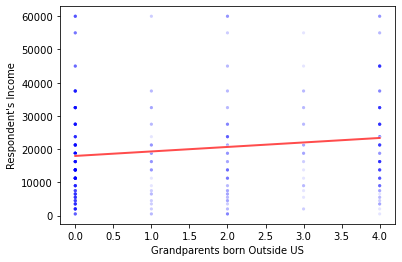

In [109]:
# Calculate fit line
fit_xs, fit_ys = FitLine(granborn, inter, slope)
# Set up plot
thinkplot.Scatter(granborn, rincome, color='blue', alpha=0.1, s=10)
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Grandparents born Outside US",
                 ylabel="Respondent's Income",
#                  axis=[10, 45, 0, 15],
                 legend=False)

In [110]:
# Perform regression - income and # grandparents
formula = 'rincome86_2 ~ granborn'
model = smf.ols(formula, data=cleaned)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rincome86_2   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     17.40
Date:                Fri, 29 Jul 2022   Prob (F-statistic):           3.41e-05
Time:                        19:16:56   Log-Likelihood:                -7805.2
No. Observations:                 712   AIC:                         1.561e+04
Df Residuals:                     710   BIC:                         1.562e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.796e+04    662.253     27.112      0.000    1.67e+04    1.93e+04
granborn    1351.3672    323.982      4.171      0.000     715.290    1987.444
==============================================================================
Omnibus:                      104.229   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.497
Skew:                           1.045   Prob(JB):                     3.45e-33
Kurtosis:                       3.821   Cond. No.                         2.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The difference in income between those with any grandparents born outside the US and those whose grandparents were all born within the US.

In [111]:
# Compile results
inter = results.params['Intercept']
slope = results.params['granborn']
print("Intercept:", round(inter, 2))
print("Slope:\t   ", round(slope, 2))

slope_pvalue = results.pvalues['granborn']
print("p-value of slope:", round(slope_pvalue, 7))

print("R squared:", round(results.rsquared, 3))

diff_income = granOut.rincome86_2.mean() - granUS.rincome86_2.mean()
print("Income difference:", round(diff_income, 2))

Intercept: 17955.31
Slope:	    1351.37
p-value of slope: 3.41e-05
R squared: 0.024
Income difference: 3306.85
